In [1]:
import tensorflow as tf
import os
import numpy as np
import re
from PIL import Image
import matplotlib.pyplot as plt

images/animal1.jpg


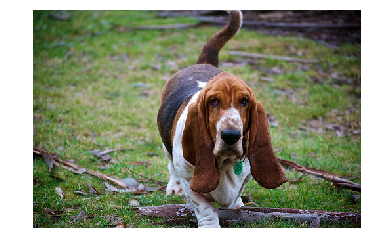

animal (score = 0.44059)
plane (score = 0.20619)
flower (score = 0.13383)
house (score = 0.11097)
guitar (score = 0.10840)

images/animal2.jpg


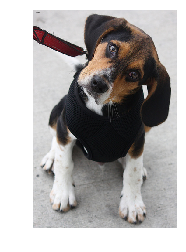

animal (score = 0.53942)
plane (score = 0.17789)
flower (score = 0.13761)
house (score = 0.07393)
guitar (score = 0.07116)

images/animal3.jpg


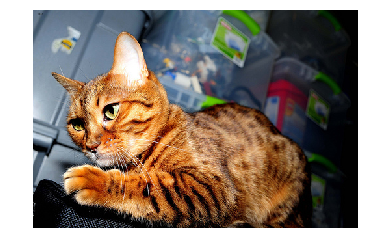

animal (score = 0.90435)
plane (score = 0.03101)
flower (score = 0.02873)
guitar (score = 0.01854)
house (score = 0.01736)

images/flower1.jpg


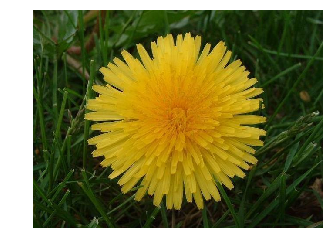

flower (score = 0.98817)
animal (score = 0.00375)
plane (score = 0.00347)
house (score = 0.00285)
guitar (score = 0.00176)

images/flower2.jpg


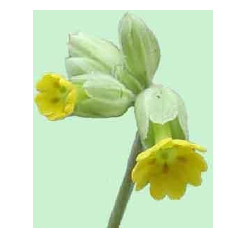

flower (score = 0.98420)
house (score = 0.00559)
animal (score = 0.00381)
plane (score = 0.00361)
guitar (score = 0.00279)

images/flower3.jpg


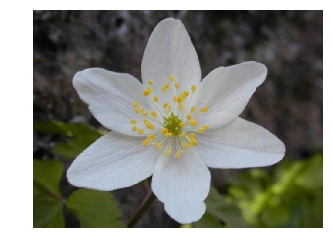

flower (score = 0.98628)
animal (score = 0.00372)
house (score = 0.00344)
plane (score = 0.00334)
guitar (score = 0.00321)

images/flower4.jpg


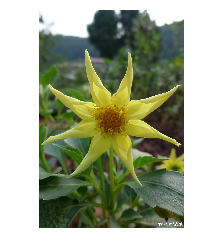

flower (score = 0.97784)
house (score = 0.00690)
plane (score = 0.00620)
animal (score = 0.00584)
guitar (score = 0.00322)

images/guitar1.jpg


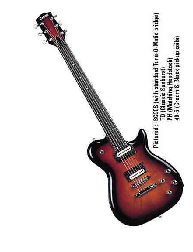

guitar (score = 0.97187)
animal (score = 0.00842)
flower (score = 0.00733)
plane (score = 0.00644)
house (score = 0.00594)

images/guitar2.jpg


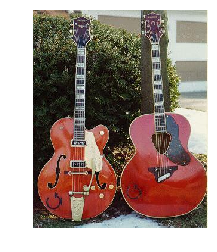

guitar (score = 0.97398)
flower (score = 0.00742)
animal (score = 0.00722)
plane (score = 0.00613)
house (score = 0.00525)

images/guitar3.jpg


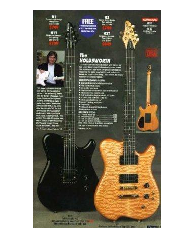

guitar (score = 0.98498)
house (score = 0.00430)
flower (score = 0.00387)
animal (score = 0.00364)
plane (score = 0.00322)

images/house1.jpg


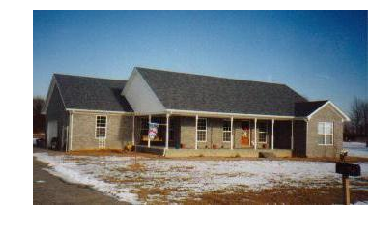

house (score = 0.93687)
flower (score = 0.02283)
animal (score = 0.01807)
plane (score = 0.01406)
guitar (score = 0.00817)

images/house2.jpg


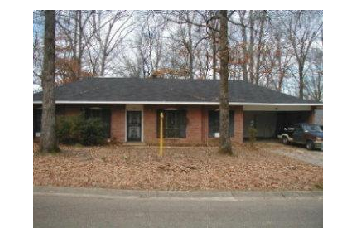

house (score = 0.98738)
animal (score = 0.00460)
plane (score = 0.00349)
flower (score = 0.00296)
guitar (score = 0.00157)

images/house3.jpg


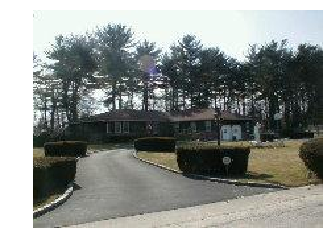

house (score = 0.94055)
plane (score = 0.01892)
flower (score = 0.01558)
animal (score = 0.01390)
guitar (score = 0.01105)

images/plane1.jpg


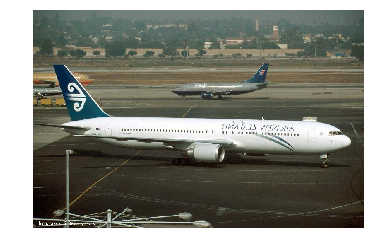

plane (score = 0.96041)
animal (score = 0.01610)
guitar (score = 0.00864)
flower (score = 0.00757)
house (score = 0.00729)

images/plane2.jpg


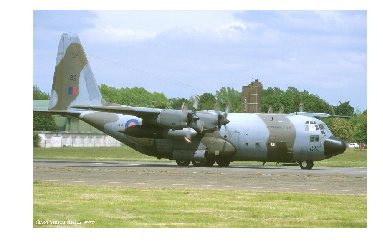

plane (score = 0.88959)
animal (score = 0.04214)
flower (score = 0.02859)
guitar (score = 0.02002)
house (score = 0.01965)

images/plane3.jpg


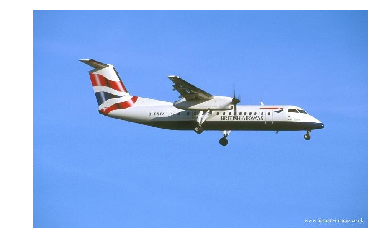

plane (score = 0.98060)
animal (score = 0.00773)
house (score = 0.00409)
flower (score = 0.00394)
guitar (score = 0.00365)



In [2]:
lines = tf.gfile.GFile('output_labels.txt').readlines()
uid_to_human = {}

# 一行一行读取数据
for uid,line in enumerate(lines) :
    #去掉换行符
    line=line.strip('\n')
    uid_to_human[uid] = line

# 分类编号变成描述
def id_to_string(node_id):
    if node_id not in uid_to_human:
        return ''
    return uid_to_human[node_id]


# 创建一个图来存放训练好的模型
with tf.gfile.GFile('output_graph.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    tf.import_graph_def(graph_def, name='')


with tf.Session() as sess:
    # final_result为输出tensor的名字
    softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')
    # 遍历目录
    for root,dirs,files in os.walk('images/'):
        for file in files:
            # 载入图片
            image_data = tf.gfile.GFile(os.path.join(root,file), 'rb').read()
            # 把图像数据传入模型获得模型输出结果
            predictions = sess.run(softmax_tensor,{'DecodeJpeg/contents:0': image_data})
            # 把结果转为1维数据
            predictions = np.squeeze(predictions)
            # 打印图片路径及名称
            image_path = os.path.join(root,file)
            print(image_path)
            # 显示图片
            img=Image.open(image_path)
            plt.imshow(img)
            plt.axis('off')
            plt.show()

            # 排序
            top_k = predictions.argsort()[::-1]
            for node_id in top_k:     
                # 获取分类名称
                human_string = id_to_string(node_id)
                # 获取该分类的置信度
                score = predictions[node_id]
                print('%s (score = %.5f)' % (human_string, score))
            print()